In [244]:
import plotly.express as px
import pandas as pd
import os
import glob
import getorg
from geopy import Nominatim
from io import StringIO
import re
import numpy as np

geocoder = Nominatim(user_agent="alexsietsema@math.ucla.edu")
location_dict = {}
location = ""
permalink = ""
title = ""

In [246]:
g = glob.glob(r"C:\Users\alexs\Projects\alexandersietsema.github.io\_talks\*.md")
for file in g[:-1]:
    with open(file, 'r',encoding='utf-8') as f:
        lines = f.read()
        if lines.find('location: "') > 1:
            loc_start = lines.find('location: "') + 11
            lines_trim = lines[loc_start:]
            loc_end = lines_trim.find('"')
            location = lines_trim[:loc_end]
                            
           
        location_dict[location] = geocoder.geocode(location)
        print(location, "\n", location_dict[location])

East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States
East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States
East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States
East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States
East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States
East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States
Baltimore, MD 
 Baltimore, Maryland, United States
Los Angeles, CA 
 Los Angeles, Los Angeles County, California, United States
Pacific Grove, CA 
 Pacific Grove, Monterey County, California, 93950, United States
Seattle, WA 
 Seattle, King County, Washington, United States
Montreal, QC, Canada 
 Montréal, Agglomération de Montréal, Montréal (région administrative), Québec, Canada
East Lansing, MI 
 East Lansing, Ingham County, Michigan, United States


In [247]:
g = glob.glob(r"C:\Users\alexs\Projects\alexandersietsema.github.io\_talks\*.md")
rows = []
for file in g:
    with open(file, 'r',encoding='utf-8') as f:
        lines = f.read().splitlines()
        L = {}
        for line in lines[1:-1]:
            key = line[:line.find(":")]
            val = line[line.find(":")+2:].replace('"', "")
            L[key] = val
        rows.append(L)
df = pd.DataFrame(rows)
df['loc'] = df['location'].apply(lambda x: geocoder.geocode(x))
df['counts'] = df[['title', 'location']].groupby('location').cumcount()
def get_lat_lon(loc, count):
    loc = geocoder.geocode(loc)
    x,y = 0.001*count*np.cos(count), 0.001*count*np.sin(count)
    return loc.latitude + x, loc.longitude + y

df[['lat','lon']] = df.apply(lambda x: get_lat_lon(x['loc'], x['counts']), axis=1, result_type='expand')

In [248]:
df

,title,collection,type,permalink,venue,date,location,loc,counts,lat,lon
0,An Algorithm For Counting Admissible Pinnacle ...,posters,Poster,/posters/2021_an_algorithm,Permutation Patterns 2021 (University of Strat...,2021-01-01,"East Lansing, MI","(East Lansing, Ingham County, Michigan, United...",0,42.732031,-84.472168
1,A Cyclic Variant of the Erdős-Szekeres Theorem,posters,Poster,/posters/2021_a_cyclic,"Joint Mathematics Meetings Poster Session, JMU...",2021-01-01,"East Lansing, MI","(East Lansing, Ingham County, Michigan, United...",1,42.732571,-84.471326
2,Comparing One-Step and Two-Step Descattering a...,posters,Poster,/posters/2021_comparing_one-step,Department of CMSE Student Research Symposium,2021-01-01,"East Lansing, MI","(East Lansing, Ingham County, Michigan, United...",2,42.731198,-84.470349
3,Pattern Avoidance in Cyclic Permutations,posters,Poster,/posters/2021_pattern_avoidance,"Joint Mathematics Meetings Poster Session, JMU...",2021-01-01,"East Lansing, MI","(East Lansing, Ingham County, Michigan, United...",3,42.729061,-84.471744
4,Pattern Avoidance in Cyclic Permutations,talks,Talk,/talks/2021_pattern_avoidance_gauss,Department of Mathematics Graduate and Undergr...,2021-01-01,"East Lansing, MI","(East Lansing, Ingham County, Michigan, United...",4,42.729416,-84.475195
5,A Stochastic Subtraction Game (and how to win ...,talks,Talk,/talks/2021_a_stochastic_subtraction_game,Michigan State University Graduate and Undergr...,2022-05-01,"East Lansing, MI","(East Lansing, Ingham County, Michigan, United...",5,42.733449,-84.476962
6,Comparing One-step and Two-step Scatter Correc...,posters,Poster,/posters/2021_onestep_twostep,CT Meeting 2022,2022-06-01,"Baltimore, MD","(Baltimore, Maryland, United States, (39.29088...",0,39.290882,-76.610759
7,Stochastic Iterative Methods for Online Rank A...,posters,Poster,/posters/2024_stochastic_ranking,UCLA 'Research in the Age of AI' Symposium,2024-02-14,"Los Angeles, CA","(Los Angeles, Los Angeles County, California, ...",0,34.053691,-118.242766
8,Stratified Non-Negative Tensor Factorization,ctalks,Conference Talk,/ctalks/2024_stratified,"58th Asilomar Conference on Signals, Systems, ...",2024-10-28,"Pacific Grove, CA","(Pacific Grove, Monterey County, California, 9...",0,36.621115,-121.917794
9,Stochastic Iterative Methods for Online Rank A...,posters,Poster,/posters/2025_stochastic,2nd Conf. on Random Matrix Theory and Numerica...,2025-06-01,"Seattle, WA","(Seattle, King County, Washington, United Stat...",0,47.603832,-122.330062


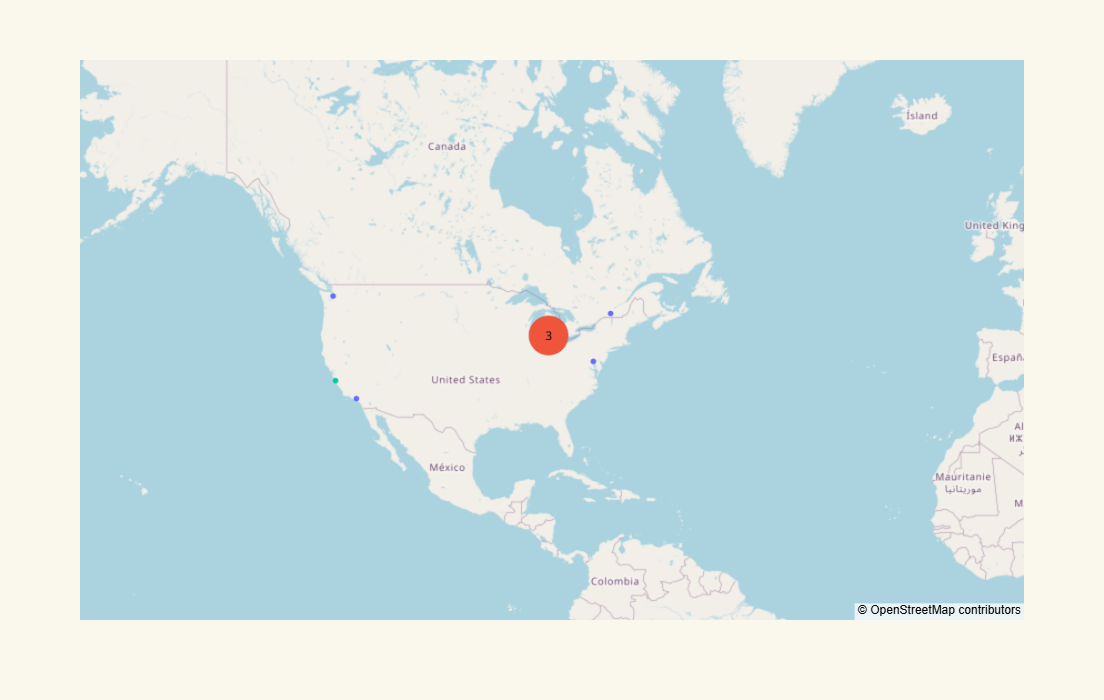

In [273]:
fig = px.scatter_map(df, lat="lat", lon="lon", color="type", zoom=2, width=850,height=700, custom_data=['type', 'title', 'location', 'date'], map_style='open-street-map')
fig.update_traces(cluster={"enabled": True, 'maxzoom':9})
fig.update_traces(hovertemplate="%{customdata[0]}: %{customdata[1]} <br> %{customdata[2]}, %{customdata[3]}<extra></extra>")
fig.update_layout(showlegend=False,mapbox=dict(pitch=0, bearing=0), paper_bgcolor='#faf7ec')
fig.write_html(r"C:\Users\alexs\Projects\alexandersietsema.github.io\talkmap\mapnew.html")
fig.show()